<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


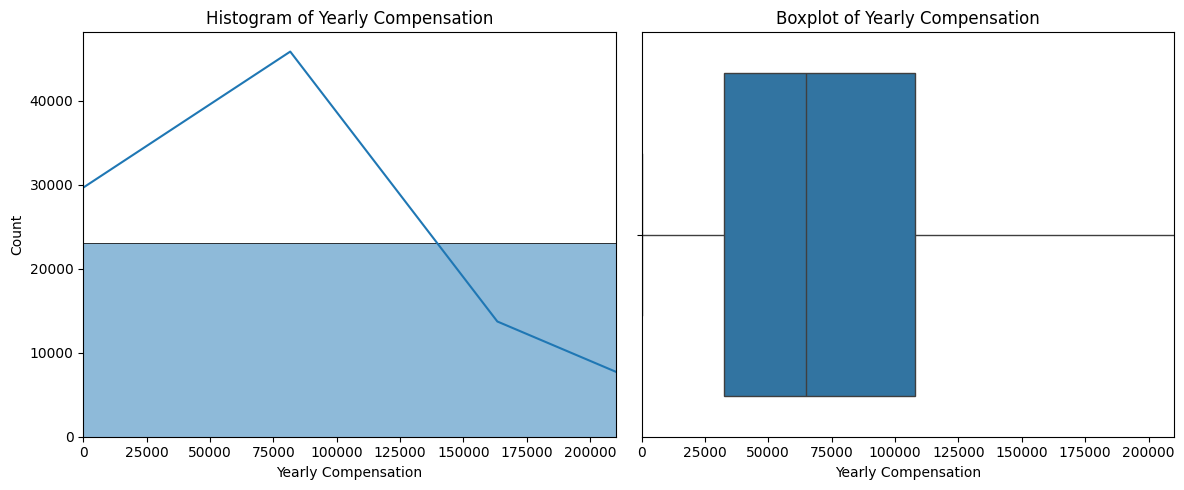

In [6]:
# Plot the distribution and histogram for ConvertedCompYearly

plt.figure(figsize=(12,5))

# Histogram with KDE, limit x-axis to 95th percentile for better visualization
plt.subplot(1,2,1)
sns.histplot(df['ConvertedCompYearly'].dropna(), bins=50, kde=True)
plt.title('Histogram of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.xlim([0, df['ConvertedCompYearly'].quantile(0.95)])

# Boxplot, limit x-axis to 95th percentile for better visualization
plt.subplot(1,2,2)
sns.boxplot(x=df['ConvertedCompYearly'].dropna())
plt.title('Boxplot of Yearly Compensation')
plt.xlabel('Yearly Compensation')
plt.xlim([0, df['ConvertedCompYearly'].quantile(0.95)])

plt.tight_layout()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [7]:
# Filter data for full-time employees
full_time = df[df['Employment'] == 'Employed, full-time']

# Calculate median compensation
median_comp = full_time['ConvertedCompYearly'].median()
print(f"Median compensation for full-time employees: {median_comp:.2f}")
      

Median compensation for full-time employees: 69814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



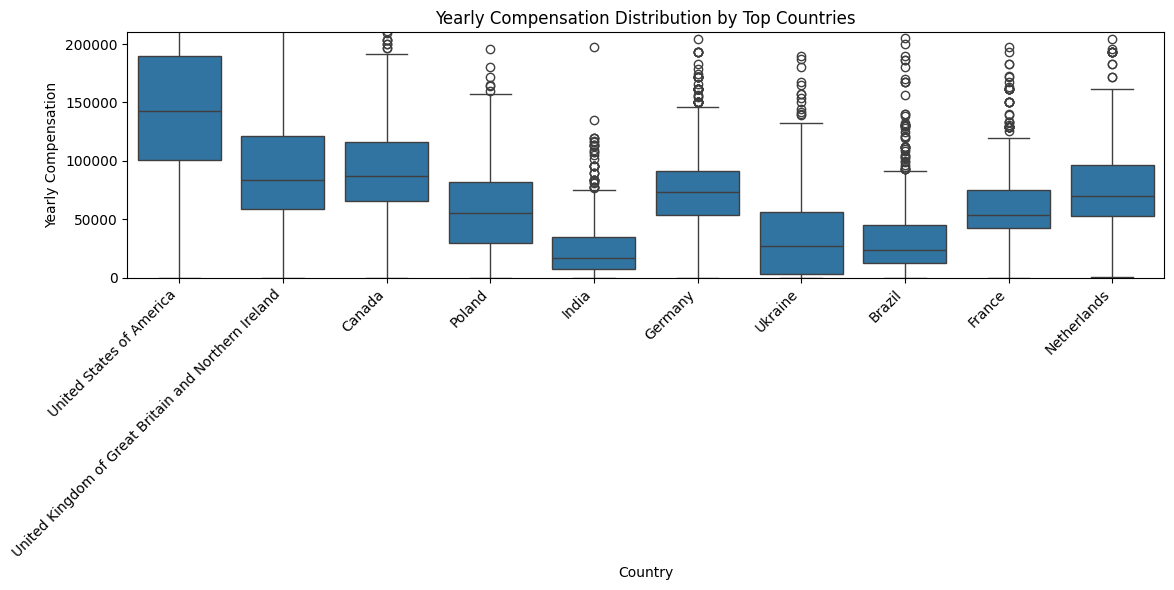

In [9]:
# Show top 10 countries by respondent count
top_countries = df['Country'].value_counts().head(10).index
df_top = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top)
plt.xticks(rotation=45, ha='right')
plt.title('Yearly Compensation Distribution by Top Countries')
plt.xlabel('Country')
plt.ylabel('Yearly Compensation')
plt.ylim([0, df['ConvertedCompYearly'].quantile(0.95)])
plt.tight_layout()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [11]:
## Write your code here

# Calculate IQR for ConvertedCompYearly
q1 = df['ConvertedCompYearly'].quantile(0.25)
q3 = df['ConvertedCompYearly'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

ConvertedCompYearly_No_Outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print(f"Original dataset size: {df.shape[0]}")
print(f"Refined dataset size after removing outliers: {ConvertedCompYearly_No_Outliers.shape[0]}")


Original dataset size: 65437
Refined dataset size after removing outliers: 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


<Axes: >

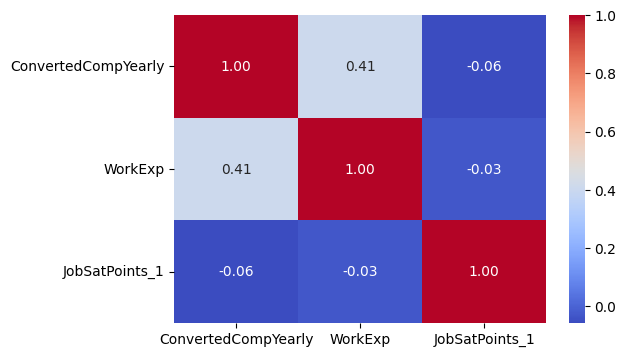

In [12]:
## Write your code here
# Calculate correlations between ConvertedCompYearly, WorkExp, and JobSatPoints_1
corr_cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']
corr_matrix = ConvertedCompYearly_No_Outliers[corr_cols].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

C:\Users\Big Honk\AppData\Local\Temp\ipykernel_30500\900309264.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ConvertedCompYearly_No_Outliers['NegativeJobSat'] = ConvertedCompYearly_No_Outliers[negative_cols].sum(axis=1)
C:\Users\Big Honk\AppData\Local\Temp\ipykernel_30500\900309264.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ConvertedCompYearly_No_Outliers['PositiveJobSat'] = ConvertedCompYearly_No_Outliers[positive_cols].sum(axis=1)


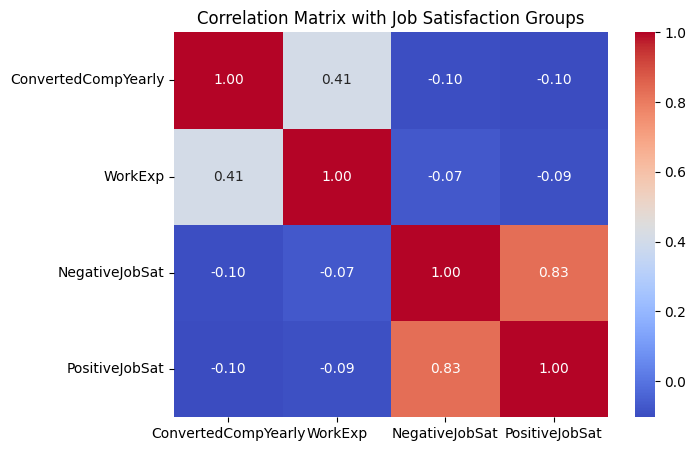

In [15]:
# Define NegativeJobSat and PositiveJobSat based on available columns

negative_cols = [f'JobSatPoints_{i}' for i in range(1, 6) if f'JobSatPoints_{i}' in ConvertedCompYearly_No_Outliers.columns]
positive_cols = [f'JobSatPoints_{i}' for i in range(6, 11) if f'JobSatPoints_{i}' in ConvertedCompYearly_No_Outliers.columns]

ConvertedCompYearly_No_Outliers['NegativeJobSat'] = ConvertedCompYearly_No_Outliers[negative_cols].sum(axis=1)
ConvertedCompYearly_No_Outliers['PositiveJobSat'] = ConvertedCompYearly_No_Outliers[positive_cols].sum(axis=1)

corr_cols = ['ConvertedCompYearly', 'WorkExp', 'NegativeJobSat', 'PositiveJobSat']
corr_matrix = ConvertedCompYearly_No_Outliers[corr_cols].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Job Satisfaction Groups')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


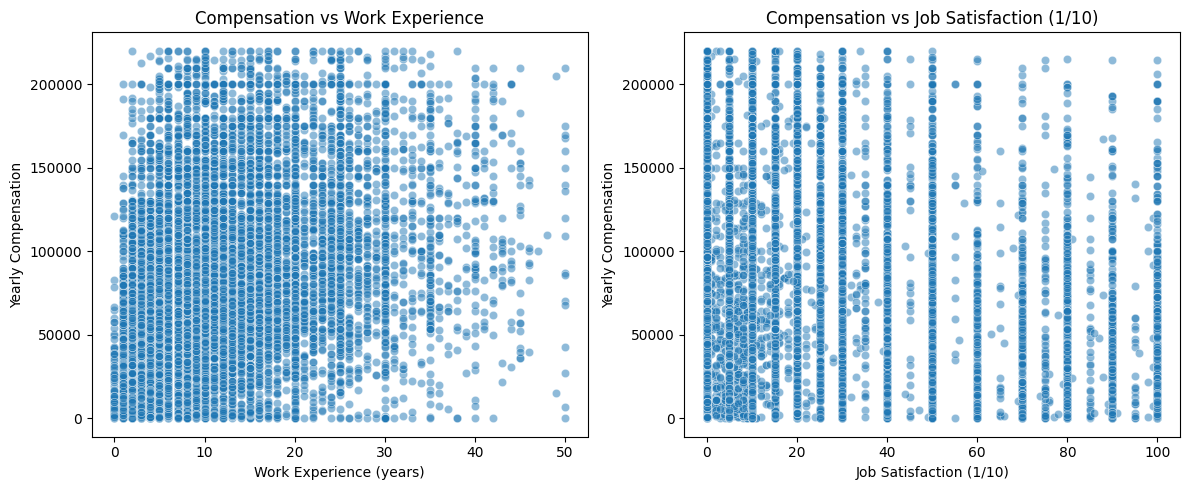

In [16]:
## Write your code here
# Scatter plot: ConvertedCompYearly vs WorkExp
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='WorkExp', y='ConvertedCompYearly', data=ConvertedCompYearly_No_Outliers, alpha=0.5)
plt.title('Compensation vs Work Experience')
plt.xlabel('Work Experience (years)')
plt.ylabel('Yearly Compensation')

# Scatter plot: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1,2,2)
sns.scatterplot(x='JobSatPoints_1', y='ConvertedCompYearly', data=ConvertedCompYearly_No_Outliers, alpha=0.5)
plt.title('Compensation vs Job Satisfaction (1/10)')
plt.xlabel('Job Satisfaction (1/10)')
plt.ylabel('Yearly Compensation')

plt.tight_layout()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
